# Damped Harmonic Oscillator #
## A Physics Informed Neural Network (PINN) on Qiskit Quantum Computer ##

In [7]:
# load dependencies

import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split

from qiskit.algorithms.optimizers import ADAM, SPSA
from qiskit.circuit.library import TwoLocal, ZZFeatureMap
from qiskit.primitives import BackendEstimator, BackendSampler
from qiskit.quantum_info import Pauli
from qiskit_aer import AerSimulator
from qiskit_algorithms.gradients import ParamShiftEstimatorGradient, ParamShiftSamplerGradient

from qiskit_machine_learning.algorithms.classifiers import NeuralNetworkClassifier
from qiskit_machine_learning.neural_networks import EstimatorQNN, SamplerQNN
from qiskit_machine_learning.utils.loss_functions import CrossEntropyLoss

In [14]:
# load data
path = os.getcwd()
data_folder = "dataset"
train_data_file = "train.csv"
test_data_file = "test.csv"
train_data_path = os.path.join(path, data_folder, train_data_file)
test_data_path = os.path.join(path, data_folder, test_data_file)

train_data = pd.read_csv(train_data_path)
test_data = pd.read_csv(test_data_path)

In [15]:
# examine the data
train_data, test_data

(           time  displacement      velocity  acceleration
 0      0.000000  1.000000e+00  0.000000e+00 -1.000000e+00
 1      1.507538  1.067009e-01 -9.265856e-01 -1.404238e-02
 2      3.015075 -8.471749e-01 -1.118788e-01  8.583629e-01
 3      4.522613 -1.940599e-01  7.834100e-01  1.157189e-01
 4      6.030151  7.051903e-01  1.908139e-01 -7.242717e-01
 ..          ...           ...           ...           ...
 195  293.969850 -6.679955e-08  4.094007e-07  2.585948e-08
 196  295.477400  3.721939e-07  6.650827e-08 -3.788447e-07
 197  296.984920  1.005445e-07 -3.442146e-07 -6.612302e-08
 198  298.492460 -3.088807e-07 -9.734748e-08  3.186155e-07
 199  300.000000 -1.226690e-07  2.854318e-07  9.412586e-08
 
 [200 rows x 4 columns],
            time  displacement      velocity  acceleration
 0      0.000000  1.000000e+00  0.000000e+00 -1.000000e+00
 1      1.003345  5.523100e-01 -8.023733e-01 -4.720727e-01
 2      2.006689 -3.387563e-01 -8.219389e-01  4.209502e-01
 3      3.010034 -8.466000e-0

<Axes: >

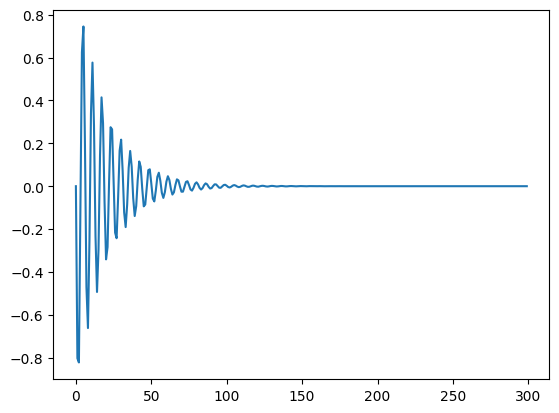

In [19]:
test_data["velocity"].plot()